In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms
from random import randint
from random import random
import random

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [ ]:
n_epochs = 3
batch_size_train = 1
batch_size_test = 1000
learning_rate = 0.1
momentum = 0.5
log_interval = 100

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        return x#F.softmax(x)

In [ ]:
def train(epoch, network):
  network.train()
  correct = 0
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.cross_entropy(output, target)
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).sum()
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      #torch.save(network.state_dict(), '/results/model.pth')
      #torch.save(optimizer.state_dict(), '/results/optimizer.pth')
  print(f'train Accuracy {100.*correct/len(train_loader.dataset):.3f} ')

def test(network):
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:

      output = network(data)
      test_loss += F.cross_entropy(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  return 100. * correct / len(test_loader.dataset)

In [ ]:
n_epochs = 3
batch_size_train = 1
batch_size_test = 1000
learning_rate = 0.1
momentum = 0.5
log_interval = 100

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [ ]:
whole_accuracies = []
max_trials = 1
for trial in range(max_trials):
    network = Net()
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                        momentum=momentum)
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
    for epoch in range(1, 1 + 1):
        train(epoch, network)
    acc =  test(network)
    whole_accuracies.append(acc)
print(f'whole avg acc is {np.average(np.asarray(whole_accuracies)):.3f} std {np.std(np.asarray(whole_accuracies)):.3f}')

In [ ]:
MAX_TRIALS = 5
RESOLUTION = 1
MAX_SIZE = 30

In [ ]:
def train_teach_random(epoch, network):
    network.train()
    correct = 0
    test_errors = [[] for _ in range(MAX_TRIALS)]
    data_sizes  = []
    for trial in range(MAX_TRIALS):
        train_data = list(enumerate(train_loader))
        data_sizes = []
        network = Net()
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        for i in range(len(train_data)):
            if i % RESOLUTION == 0:
                print("evaluating at size " + str(i) )
                t_error = test(network)
                test_errors[trial].append(t_error)
                data_sizes.append(i)
            if i > MAX_SIZE:
                break
            data = train_data[i][1][0]
            target = train_data[i][1][1]
            optimizer.zero_grad()
            output = network(data)
            loss = F.cross_entropy(output, target)
            #pred = output.data.max(1, keepdim=True)[1]
            #correct += pred.eq(target.data.view_as(pred)).sum()
            loss.backward()
            optimizer.step()

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.plot(data_sizes, test_errors[0], label = "random")
    plt.legend
    plt.ylabel('Test Accuracy')
    plt.xlabel('train data size')
    #plt.savefig("mnist_left_right_exp.pdf",dpi=1000)
    plt.show()
    return data_sizes, test_errors

network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
data_sizes_rand, test_errors_rand = train_teach_random(0, network)

In [ ]:
def train_teach_confidence(epoch, network):
    network.train()
    correct = 0
    train_data = list(enumerate(train_loader))
    indices_used = []
    data_sizes  = []
    test_errors = [[] for _ in range(MAX_TRIALS)]
    for trial in range(MAX_TRIALS):
        data_sizes = []
        network = Net()
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        for i in range(len(train_data)):
            if i % RESOLUTION == 0:
                print("evaluating at size " + str(i) )
                t_error = test(network)
                test_errors[trial].append(t_error)
                data_sizes.append(i)
            if i > MAX_SIZE:
                break
            # rank data by uncertainty (entropy) and find point of most uncertainty
            network.eval()
            max_index = 0
            max_entropy = 0
            valid_indices = list(set(list(range(len(train_data)))) - set(indices_used))
            subset_size = len(valid_indices) # to make this run more efficiently
            random_subset = random.sample(valid_indices, subset_size)
            for j in random_subset:
                data = train_data[j][1][0]
                target = train_data[j][1][1]
                optimizer.zero_grad()
                output = network(data) 
                output = F.softmax(output)
                entropy = torch.distributions.Categorical(probs = output).entropy()
                if entropy >= max_entropy:
                    max_entropy = entropy
                    max_index = j

            indices_used.append(max_index) # add found element to set used

            # take training step on that point
            network.train()
            data = train_data[max_index][1][0]
            target = train_data[max_index][1][1]
            optimizer.zero_grad()
            output = network(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.plot(data_sizes, test_errors[0], label ="entropy AL")
    plt.ylabel('Test Accuracy')
    plt.xlabel('train data size')
    #plt.savefig("mnist_left_right_exp.pdf",dpi=1000)
    plt.show()
    return data_sizes, test_errors
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
data_sizes_conf, test_errors_conf  = train_teach_confidence(0, network)

evaluating at size 0

Test set: Avg. loss: 0.0024, Accuracy: 712/10000 (7.12%)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor(0.1300)
evaluating at size 1

Test set: Avg. loss: 0.0163, Accuracy: 1053/10000 (10.53%)

tensor(0.2100)
evaluating at size 2

Test set: Avg. loss: 0.0158, Accuracy: 2055/10000 (20.55%)

tensor(0.3400)
evaluating at size 3

Test set: Avg. loss: 0.0180, Accuracy: 2896/10000 (28.96%)

tensor(0.3860)
evaluating at size 4

Test set: Avg. loss: 0.0170, Accuracy: 3482/10000 (34.82%)

tensor(0.3940)
evaluating at size 5

Test set: Avg. loss: 0.0158, Accuracy: 3929/10000 (39.29%)

tensor(0.4380)
evaluating at size 6

Test set: Avg. loss: 0.0154, Accuracy: 4314/10000 (43.14%)

tensor(0.4460)
evaluating at size 7

Test set: Avg. loss: 0.0140, Accuracy: 4361/10000 (43.61%)

tensor(0.4960)
evaluating at size 8

Test set: Avg. loss: 0.0122, Accuracy: 5033/10000 (50.33%)

tensor(0.5720)
evaluating at size 9

Test set: Avg. loss: 0.0108, Accuracy: 5331/10000 (53.31%)

tensor(0.5720)
evaluating at size 10

Test set: Avg. loss: 0.0111, Accuracy: 5252/10000 (52.52%)

tensor(0.5360)
evaluating at 

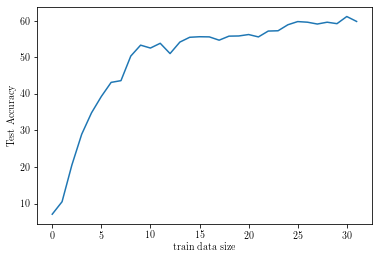

In [ ]:
import copy
def train_teach_greedy_loss(epoch, network):
    network.train()
    correct = 0
    train_data = list(enumerate(train_loader))
    data_sizes  = []
    indices_used = []
    test_errors = [[] for _ in range(MAX_TRIALS)]
    for trial in range(MAX_TRIALS):
        data_sizes = []
        network = Net()
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        for i in range(len(train_data)):
            if i % RESOLUTION == 0:
                print("evaluating at size " + str(i) )
                t_error = test(network)
                test_errors[trial].append(t_error)
                data_sizes.append(i)
            if i > MAX_SIZE:
                break
            # for each point, compute average entropy on subset, find point with the least entropy and train on

            # save model
            model_state_dict = copy.deepcopy(network.state_dict())
            optimizer_state_dict = copy.deepcopy(optimizer.state_dict())
        
            valid_indices = list(set(list(range(len(train_data)))) - set(indices_used))
            subset_size = 1000
            random_teach_subset = random.sample(valid_indices, subset_size) # used to take gradient steps
            random_validation_subset = random.sample(valid_indices, 500) # use to evaluate performance after gradient step
            best_index = 0
            min_avg_entropy = 0
            for j in random_teach_subset:
                network.train()
                # take gradient step with point
                data = train_data[j][1][0]
                target = train_data[j][1][1]
                optimizer.zero_grad()
                output = network(data) 
                loss = F.cross_entropy(output, target)
                loss.backward()
                optimizer.step()
                # compute average entropy after training with point
                avg_entropy = 0.0
                network.eval()
                for k in random_validation_subset:
                    data = train_data[k][1][0]
                    target = train_data[k][1][1]
                    output = network(data) 
                    output = F.softmax(output)
                    pred = output.data.max(1, keepdim=True)[1]
                    #output[0][target] 
                    avg_entropy += pred.eq(target.data.view_as(pred)).sum()
                    #entropy = torch.distributions.Categorical(probs = output).entropy()
                    #avg_entropy += entropy   
                avg_entropy /= len(random_validation_subset)
                # check if this point is better
                if avg_entropy >= min_avg_entropy:
                    min_avg_entropy = avg_entropy
                    best_index = j
                # revert gradient step
                network.load_state_dict(model_state_dict)
                optimizer.load_state_dict(optimizer_state_dict)
            print(min_avg_entropy)
            indices_used.append(best_index) # add found element to set used

            # take training step on that point
            network.train()
            data = train_data[best_index][1][0]
            target = train_data[best_index][1][1]
            optimizer.zero_grad()
            output = network(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.plot(data_sizes, test_errors[0], label ="entropy AL")
    plt.ylabel('Test Accuracy')
    plt.xlabel('train data size')
    #plt.savefig("mnist_left_right_exp.pdf",dpi=1000)
    plt.show()
    return data_sizes, test_errors
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
data_sizes_greedy, test_errors_greedy  = train_teach_greedy_loss(0, network)

In [ ]:
teacher_net = Net()
optimizer = optim.SGD(teacher_net.parameters(), lr=learning_rate,
                    momentum=momentum)
for epoch in range(1, 1 + 1):
    train(epoch, teacher_net)

Train Epoch: 1 [0/60000 (0%)]	Loss: 1.892541
Train Epoch: 1 [100/60000 (0%)]	Loss: 12.795199
Train Epoch: 1 [200/60000 (0%)]	Loss: 0.000000
Train Epoch: 1 [300/60000 (0%)]	Loss: 30.306171
Train Epoch: 1 [400/60000 (1%)]	Loss: 0.000000
Train Epoch: 1 [500/60000 (1%)]	Loss: 0.000000
Train Epoch: 1 [600/60000 (1%)]	Loss: 5.067786
Train Epoch: 1 [700/60000 (1%)]	Loss: 29.235291
Train Epoch: 1 [800/60000 (1%)]	Loss: 0.000000
Train Epoch: 1 [900/60000 (2%)]	Loss: 0.000000
Train Epoch: 1 [1000/60000 (2%)]	Loss: 0.000000
Train Epoch: 1 [1100/60000 (2%)]	Loss: 71.169594
Train Epoch: 1 [1200/60000 (2%)]	Loss: 0.000000
Train Epoch: 1 [1300/60000 (2%)]	Loss: 0.000000
Train Epoch: 1 [1400/60000 (2%)]	Loss: 0.000000
Train Epoch: 1 [1500/60000 (2%)]	Loss: 0.000000
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.000000
Train Epoch: 1 [1700/60000 (3%)]	Loss: 0.000000
Train Epoch: 1 [1800/60000 (3%)]	Loss: 0.000000
Train Epoch: 1 [1900/60000 (3%)]	Loss: 0.000000
Train Epoch: 1 [2000/60000 (3%)]	Loss: 0.000000


evaluating at size 0

Test set: Avg. loss: 0.0025, Accuracy: 790/10000 (7.90%)

tensor(0.2030)
evaluating at size 1

Test set: Avg. loss: 0.0155, Accuracy: 1753/10000 (17.53%)

tensor(0.2870)
evaluating at size 2

Test set: Avg. loss: 0.0159, Accuracy: 2621/10000 (26.21%)

tensor(0.3110)
evaluating at size 3

Test set: Avg. loss: 0.0175, Accuracy: 2820/10000 (28.20%)

tensor(0.3690)
evaluating at size 4

Test set: Avg. loss: 0.0166, Accuracy: 3500/10000 (35.00%)

tensor(0.4150)
evaluating at size 5

Test set: Avg. loss: 0.0166, Accuracy: 4095/10000 (40.95%)

tensor(0.4760)
evaluating at size 6

Test set: Avg. loss: 0.0154, Accuracy: 4436/10000 (44.36%)

tensor(0.4830)
evaluating at size 7

Test set: Avg. loss: 0.0137, Accuracy: 4831/10000 (48.31%)

tensor(0.5560)
evaluating at size 8

Test set: Avg. loss: 0.0119, Accuracy: 5201/10000 (52.01%)

tensor(0.5580)
evaluating at size 9

Test set: Avg. loss: 0.0111, Accuracy: 5369/10000 (53.69%)

tensor(0.5570)
evaluating at size 10

Test set:

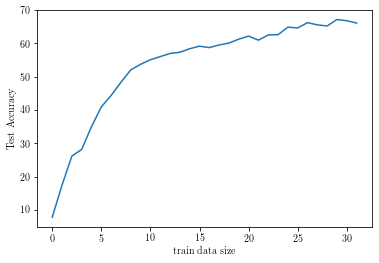

In [ ]:
import copy
MAX_TRIALS = 1 
def train_teach_greedy_teacher(network, teacher_net):
    network.train()
    correct = 0
    train_data = list(enumerate(train_loader))
    data_sizes  = []
    indices_used = []
    test_errors = [[] for _ in range(MAX_TRIALS)]
    for trial in range(MAX_TRIALS):
        data_sizes = []
        network = Net()
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        for i in range(len(train_data)):
            if i % RESOLUTION == 0:
                print("evaluating at size " + str(i) )
                t_error = test(network)
                test_errors[trial].append(t_error)
                data_sizes.append(i)
            if i > MAX_SIZE:
                break
            # for each point, compute average entropy on subset, find point with the least entropy and train on

            # save model
            model_state_dict = copy.deepcopy(network.state_dict())
            optimizer_state_dict = copy.deepcopy(optimizer.state_dict())
        
            valid_indices = list(set(list(range(len(train_data)))) - set(indices_used))
            subset_size = 10000
            random_teach_subset = random.sample(valid_indices, subset_size) # used to take gradient steps
            random_validation_subset = random.sample(valid_indices, 1000) # use to evaluate performance after gradient step
            best_index = 0
            min_disagreement = 0
            for j in random_teach_subset:
                network.train()
                # take gradient step with point
                data = train_data[j][1][0]
                target = train_data[j][1][1]
                optimizer.zero_grad()
                output = network(data) 
                loss = F.cross_entropy(output, target)
                loss.backward()
                optimizer.step()
                # compute average entropy after training with point
                avg_disagreement= 0.0
                network.eval()
                for k in random_validation_subset:
                    data = train_data[k][1][0]
                    target = train_data[k][1][1]
                    output = network(data) 
                    output_teacher = teacher_net(data) 
                    pred = output.data.max(1, keepdim=True)[1]
                    pred_teacher = output_teacher.data.max(1, keepdim=True)[1]
                    avg_disagreement += (pred[0][0] == pred_teacher[0][0])
                avg_disagreement /= len(random_validation_subset)
                # check if this point is better
                if avg_disagreement >= min_disagreement:
                    min_disagreement = avg_disagreement
                    best_index = j
                # revert gradient step
                network.load_state_dict(model_state_dict)
                optimizer.load_state_dict(optimizer_state_dict)
            print(min_disagreement)
            indices_used.append(best_index) # add found element to set used

            # take training step on that point
            network.train()
            data = train_data[best_index][1][0]
            target = train_data[best_index][1][1]
            optimizer.zero_grad()
            output = network(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.plot(data_sizes, test_errors[0], label ="entropy AL")
    plt.ylabel('Test Accuracy')
    plt.xlabel('train data size')
    #plt.savefig("mnist_left_right_exp.pdf",dpi=1000)
    plt.show()
    return data_sizes, test_errors

# learn teacher network


network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
data_sizes_greedy_teacher, test_errors_greedy_teacher  = train_teach_greedy_teacher(network, teacher_net)

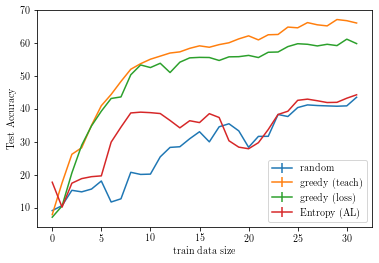

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MAX_TRIALS = 1
avgs_rand = [np.average([test_errors_rand[triall][i] for triall in range(MAX_TRIALS)]) for i in range(len(test_errors_rand[0]))]
stds_rand = [np.std([test_errors_rand[triall][i] for triall in range(MAX_TRIALS)]) for i in range(len(test_errors_rand[0]))]
plt.errorbar(data_sizes_rand,  avgs_rand, yerr=stds_rand, label=f'random')


avgs_rand = [np.average([test_errors_greedy_teacher[triall][i] for triall in range(MAX_TRIALS)]) for i in range(len(test_errors_rand[0]))]
stds_rand = [np.std([test_errors_greedy_teacher[triall][i] for triall in range(MAX_TRIALS)]) for i in range(len(test_errors_rand[0]))]
plt.errorbar(data_sizes_rand,  avgs_rand, yerr=stds_rand, label=f'greedy (teach)')


avgs_rand = [np.average([test_errors_greedy[triall][i] for triall in range(MAX_TRIALS)]) for i in range(len(test_errors_rand[0]))]
stds_rand = [np.std([test_errors_greedy[triall][i] for triall in range(MAX_TRIALS)]) for i in range(len(test_errors_rand[0]))]
plt.errorbar(data_sizes_rand,  avgs_rand, yerr=stds_rand, label=f'greedy (loss)')


avgs_rand = [np.average([test_errors_conf[triall][i] for triall in range(MAX_TRIALS)]) for i in range(len(test_errors_rand[0]))]
stds_rand = [np.std([test_errors_conf[triall][i] for triall in range(MAX_TRIALS)]) for i in range(len(test_errors_rand[0]))]
plt.errorbar(data_sizes_rand,  avgs_rand, yerr=stds_rand, label=f'Entropy (AL)')


plt.legend()
plt.ylabel('Test Accuracy')
plt.xlabel('train data size')
plt.savefig("pic.pdf")
plt.show()